# Bay Wheels's bike sharing system and its usage pattern in February-March 2020

## by Aigerim Shopenova

# Overview

Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018.

# Dataset

The dataset used for the analysis consists of Bay Wheels's trip data for public use for February and March 2020, which can be find <a href=https://www.lyft.com/bikes/bay-wheels/system-data>here</a>.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Downloading data
df_trip = pd.read_csv('202002-baywheels-tripdata.csv')

/Users/aigerimshopenova/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Data cleaning
trip_clean = df_trip.copy()
# Code
trip_clean.drop(trip_clean[trip_clean.start_station_id.isnull()].index, inplace = True)
trip_clean.drop(trip_clean[trip_clean.start_station_name.isnull()].index, inplace = True)
trip_clean.drop(trip_clean[trip_clean.end_station_id.isnull()].index, inplace = True)
trip_clean.drop(trip_clean[trip_clean.end_station_name.isnull()].index, inplace = True)
trip_clean.drop(trip_clean[trip_clean.rental_access_method.isnull()].index, inplace = True)

# Code
trip_clean['start_time'] = pd.to_datetime(trip_clean['start_time'])
trip_clean['end_time'] = pd.to_datetime(trip_clean['end_time'])
trip_clean['start_station_id'] = trip_clean['start_station_id'].astype('int')
trip_clean['end_station_id'] = trip_clean['end_station_id'].astype('int')
trip_clean['user_type'] = trip_clean['user_type'].astype('category')

# Code
trip_clean['duration_min'] = trip_clean['duration_sec']/60
trip_clean['start_date'] = trip_clean.start_time.dt.strftime('%Y-%m-%d')
trip_clean['start_hour_of_day'] = trip_clean.start_time.dt.strftime('%H')
trip_clean['start_day_of_week'] = trip_clean.start_time.dt.strftime('%A')
trip_clean['start_month'] = trip_clean.start_time.dt.strftime('%B')
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trip_clean['start_day_of_week'] = trip_clean['start_day_of_week'].astype(weekdaycat)

#Saving data to csv
trip_master = trip_clean
trip_master.to_csv('baywheels_tripdata_clean.csv')
trip_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14516 entries, 115429 to 424153
Data columns (total 19 columns):
duration_sec               14516 non-null int64
start_time                 14516 non-null datetime64[ns]
end_time                   14516 non-null datetime64[ns]
start_station_id           14516 non-null int64
start_station_name         14516 non-null object
start_station_latitude     14516 non-null float64
start_station_longitude    14516 non-null float64
end_station_id             14516 non-null int64
end_station_name           14516 non-null object
end_station_latitude       14516 non-null float64
end_station_longitude      14516 non-null float64
bike_id                    14516 non-null int64
user_type                  14516 non-null category
rental_access_method       14516 non-null object
duration_min               14516 non-null float64
start_date                 14516 non-null object
start_hour_of_day          14516 non-null object
start_day_of_week          14516 

# Motivation

## Is there any difference between different user types and different access methods during weekdays and hours?

# Research questions

**Q1: How does the average trip duration vary during a week between customers and subscribers?**

**Q2: How does the average trip duration vary during a week between different access methods?**

**Q3: How does the hourly usage vary during a week for customers and subscribers?**

**Q4: How does the hourly usage vary during a week for app and cleaper access methods?**

# Background

* The main user type is subscribers 
* Users mostly use app to access

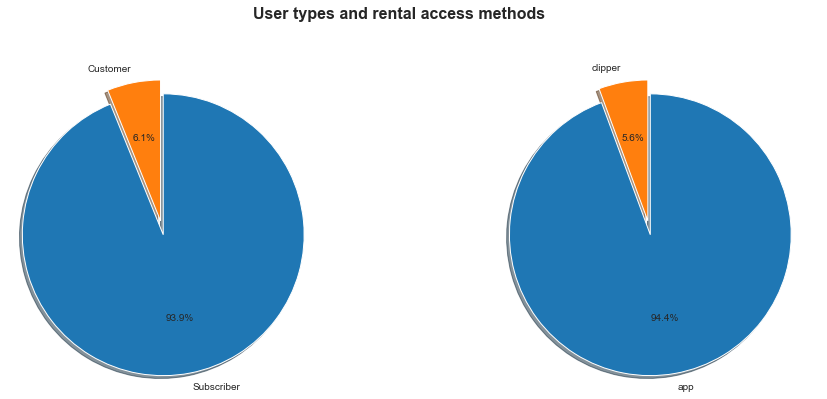

In [10]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.suptitle('User types and rental access methods', fontsize=16, fontweight='semibold', y=1.015);
plt.subplot(1, 2, 1);
sorted_vals = trip_master.user_type.value_counts()/trip_master.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
sorted_vals = trip_master.rental_access_method.value_counts()/trip_master.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

### Q1: How does the average trip duration vary during a week between customers and subscribers?

* Trip duration for customers is larger than for subscribers
* It is clear that subscribers spend less time in a trip than customers
* Both of the user types have an increasing trend for the average time for a trip by the end of a week

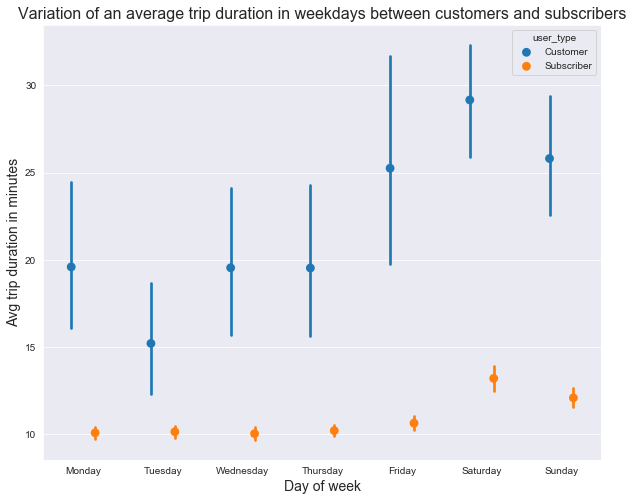

In [14]:
# Visualization
plt.figure(figsize=[10, 8]);
sb.pointplot(data=trip_master, x='start_day_of_week', y='duration_min', hue='user_type', dodge=0.3, linestyles="")
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Avg trip duration in minutes', fontsize=14)
plt.title("Variation of an average trip duration in weekdays between customers and subscribers", fontsize=16);

### Q2: How does the average trip duration vary during a week between different access methods?

* Overall, users accessed by the app tend to spend more time in a trip
* It is clear that the trend for both accessing methods is increasing by the end of a week

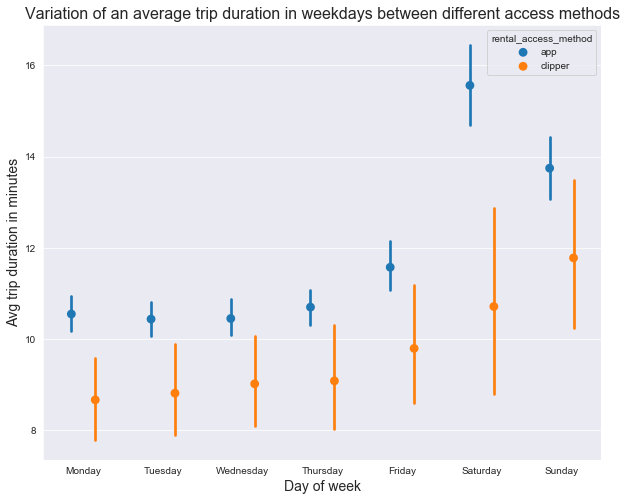

In [16]:
# Visualization
plt.figure(figsize=[10, 8]);
sb.pointplot(data=trip_master, x='start_day_of_week', y='duration_min', hue='rental_access_method', dodge=0.3, linestyles="")
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Avg trip duration in minutes', fontsize=14)
plt.title("Variation of an average trip duration in weekdays between different access methods", fontsize=16);

## Q3: How does the hourly usage vary during a week for customers and subscribers?

* Customers tend to use the bike service mostly on Saturdays from 11 AM to 4 PM, while subscribers will likely have a trip from Monday to Friday during rush hours (7-9 AM, 4 PM - 6 PM)

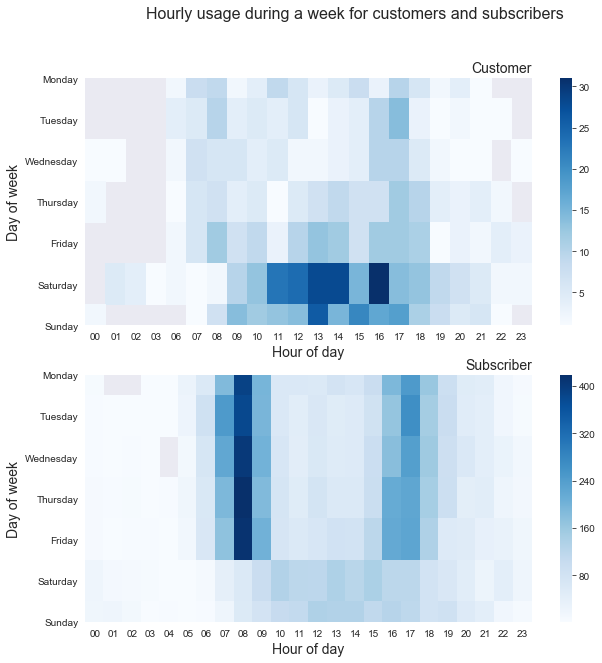

In [19]:
# Visualization
plt.figure(figsize=[10, 10]);
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16)

plt.subplot(2, 1, 1)
customers = trip_master.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = trip_master.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

## Q4: How does the hourly usage vary during a week for app and cleaper access methods?

* The access methods do not have a significant influence on a day and time of usage the service. However, if we get more data on clipper access method, the pattern may change
* As it was shown before, there is a lack of data on clipper usage type, which can be associated with some technical specifications/conditions of the service

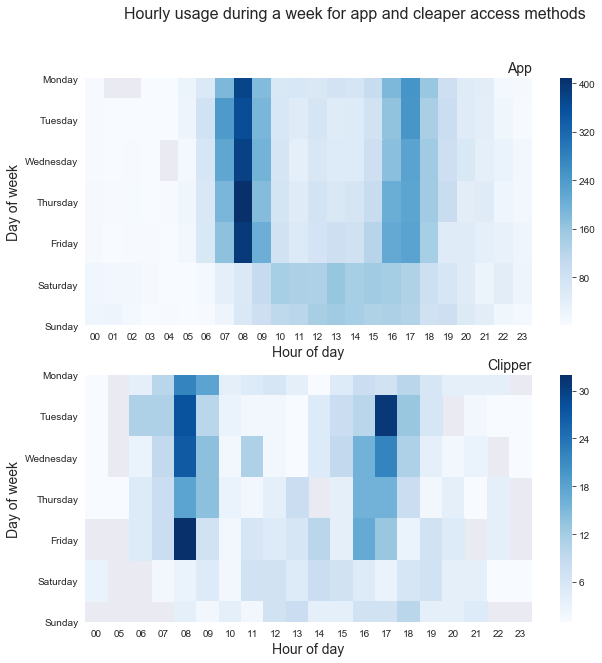

In [20]:
# Visualization
plt.figure(figsize=[10, 10]);
plt.suptitle('Hourly usage during a week for app and cleaper access methods', fontsize=16)

plt.subplot(2, 1, 1)
customers = trip_master.query('rental_access_method == "app"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('App', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = trip_master.query('rental_access_method == "clipper"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Clipper', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

# Conclusion

* There is a difference in usage patterns by day of week and hours for customers and subscribers
* The access methods do not have a significant influence on a day and time of usage